In [1]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
df = pd.read_csv('NYT_Russia_Ukraine.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df["articles"] = df["articles"].apply(lambda s: ' '.join(re.sub("[.,!?:;-='...'@#_“”()—]", " ", s).split()))

In [3]:
stop = set(stopwords.words('english'))
newStopWords = ['Mr','U']
stop.update(newStopWords)

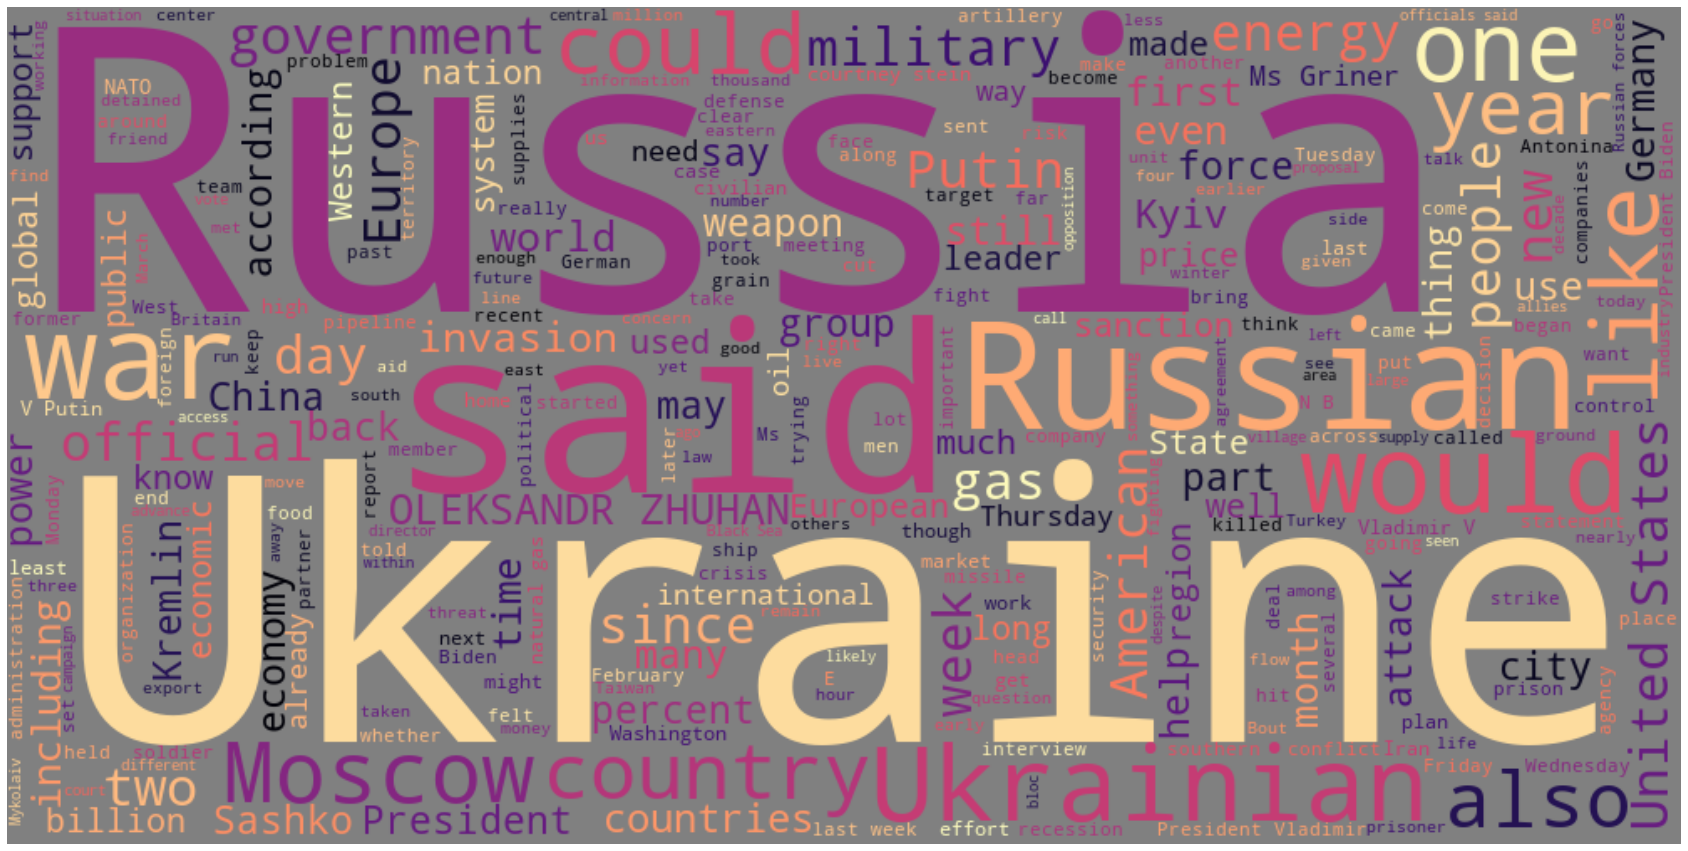

In [4]:
text = " ".join(i for i in df.articles)
wordcloud = WordCloud(stopwords=stop, background_color="grey", 
                      max_words=300,
                      width=1000, 
                      height=500,
                      colormap="magma" ).generate(text)
plt.figure( figsize=(30,30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.savefig("cloud.png", format="png")
plt.show()